#Beginning Tutorial: Backpropagation and Gradient Descent

<p>
<b>Assumptions/Recommendations</b>:<br />  I assume you know matrix/vector math, introductory calculus (differentiation, basic understanding of partial derivatives), how basic feedforward neural nets work and know how to compute the output of a 2-layer neural net, and basic python/numpy usage. I recommend Andrew Ng's machine learning coursera course as a pre-requisite for this (at least through the neural net portion of the course). I also recommend you first try to implement the code using Matlab/Octave because the syntax for linear algebra operations is much cleaner and can prevent bugs that occur when using numpy.
</p>

###Summary and Motivations

<p>This is a tutorial for a specific group of people given the aforementioned assumptions. It's for people like me. I have a programming background, but a very weak math background (I only took basic college calculus, including some multivariate). I went through Andrew Ng's machine learning course on Coursera. I understood and could make a neural network run forward, that's pretty easy. It's just some straightforward sequence of matrix multiplication.</p><p> But I did not get backpropagation. I understood the general principle, but I didn't really <i>get</i> it. I voraciously read through all the beginner tutorials about neural networks and how to train them. Most machine learing literature is at an advanced level, often described in largely mathematical terms, so even a lot of these so called beginner-level guides went over my head. I almost gave up, but decided to do just a little more researching, a little more thinking, and finally, it clicked and I built my own simple neural network trained by backpropagation and gradient descent.</p>

<p> This is written for people like me, hopefully so I can save you the pain of searching all over the internet for various explanations, to elucidate how backpropagation and gradient descent work in theory and in practice. If you've already taken Andrew Ng's course or have done some research on backprop already, then some of this will be redundant, but I don't want to just start in the middle of the story, so bear with me. I will not shy away from math, but will try to explain it in an incremental, intuitive way.
</p>

###Let's begin with Gradient Descent

<p>Our objective in training a neural network is to find a set of weights that gives us the lowest error when we run it against our training data. In a previous post, I described how I implemented a genetic algorithm (GA) to iteratively search the "weight-space," if you will, to find an optimal set of weights for the toy neural network. I also mentioned there that GAs are generally much slower than gradient descent/backpropagation, the reason is, unlike GAs where we iteratively select better weights from a random pool, gradient descent gives us directions on how to get weights to an optimum. It tells us whether we should increase or decrease the value of a specific weight in order to lower the error function. It does this using derivatives.</p>
<p>Let's imagine we have a function $f(x) = x^4 - 3x^3 + 2$ and we want to find the minimum of this function using gradient descent. Here's a graph of that function:</p>

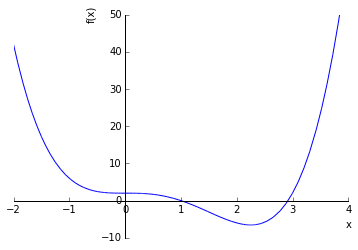

In [23]:
from sympy import symbols, init_printing
from sympy.plotting import plot
%matplotlib inline
init_printing()
x = symbols('x')
fx = x**4 - 3*x**3 + 2
p1 = plot(fx, (x, -2, 4), ylim=(-10,50)) #Plotting f(x) = x^4 - 3x^3 + 2, showing -2 < x <4

<p>As you can see, there appears to be a minimum around ~2.3 or so. Gradient descent answers this question: If I start with a random value of x, which direction should I go if I want to get to the lowest point on this function? Let's imagine I pick a random x value, say <b>x = 4</b>, which would be somewhere way up on the steep part of the right side of the graph. I obviously need to start going to the left if I want to get to the bottom. This is obvious when the function is an easily visualizable 2d plot, but when dealing with functions of multiple variables, we need to rely on the raw mathematics.</p>
<p>
Calculus tells us that the derivative of a function at a particular point is the rate of change/slope of the tangent to that part of the function. So let's use derivatives to help us get to the bottom of this function. The derivative of $f(x) = x^4 - 3x^3 + 2$ is $f'(x) = 4x^3 - 9x^2$ . So if we plug in our random point from above (x=4) into the first derivative of $f(x)$ we get $f'(4) = 4(4)^3 - 9(4)^2 = 112$. So how does 112 tell us where to go? Well, first of all, it's positive. If we were to compute $f'(-1)$ we get a negative number (-13). So it looks like we can say that whenever the $f'(x)$ for a particular $x$ is positive, we should move to the left (decrease x) and whenever it's negative, we should move to the right (increase x).</p>
<p>
Let's formalize this: When we start with a random x and compute it's deriative $f'(x)$, our <b>new x</b> should be proportional to $x - f'(x)$. I say proportional to because we want to control <em>to what degree</em> we move at each step, for example when we compute $f'(4)=112$, do we really want our new $x$ to be $x - 112 = -108$? No, if we jump all the way to -108, we're even farther from the minimum than we were before. </p><p>We want to take relatively <em>small</em> steps toward the minimum. So instead, let's say that for any random x, we want to take a step (change x a little bit) such that our <b>new $x$</b> $ = x - \alpha*f'(x)$. We'll call $\alpha$ our <em>learning rate</em> because it determines how big a step we take. $\alpha$ is something we will just have to play around with to find a good value. Some functions might require bigger steps, others smaller steps. In this case, we want small steps because the graph is very steep at each end. Let's set $\alpha$ to 0.001. This means, if we randomly started at $f'(4)=112$ then our new $x$ will be $ = 4 - (0.001 * 112) = 3.888$. So we moved to the left a little bit, toward the optimum. Let's do it again. $x_{new} = x - \alpha*f'(3.888) = 3.888 - (0.001 * 99.0436) = 3.79$ Nice, we're indeed moving to the left, closer to the minimum of $f(x)$, little by little. Let's use a little python script to make it go all the way (this is from wikipedia).
</p>

In [66]:
x_old = 0
x_new = 4 # The algorithm starts at x=4
gamma = 0.01 # step size
precision = 0.00001

def f_derivative(x):
    return 4 * x**3 - 9 * x**2

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new = x_old - gamma * f_derivative(x_old)

print("Local minimum occurs at", x_new)

Local minimum occurs at 2.2500325268933734


I think that should be relatively straightforward. The only thing new here is the precision constant. That is just telling the script when to stop. If x is not changing by more than 0.00001, then we're probably at the bottom of the "bowl" because our slope is approaching 0, and therefore we should stop and call it a day. Now, if you remember some calculus and algebra, you could have solved for this minimum analytically, and you should get $\frac 94 = 2.25$. Very close to what our gradient descent algorithm above found.

<p>That's it, that's gradient descent. Well, it's vanilla gradient descent. There are some bells and whistles we could add to this process to make it behave better in some situations, but I'll have to cover that in another post. One thing to note, however, is that gradient descent cannot gaurantee finding the <em>global</em> minimum of a function. If a function contains local and global minima, it's quite possible that gradient descent will converge on a local optimum. One way to deal with this is to just make sure we start at random positions, run it a few times, and see if we get different results. If our random starting point is closer to the global minimum than to the local minimum, we'll converge to that.</p>

###More Gradient Descent...

<p>As you might imagine, when we use gradient descent for a neural network, things get a lot more complicated. Not because gradient descent gets more complicated, it still ends up just being a matter of taking small steps downhill, it's that we need that pesky derivative in order to use gradient descent, and the derivative of a neural network cost function (with respect to its weights) is pretty intense. It's not a matter of just analytically solving $f(x)=x^2, f'(x)=2x$ , because the output of a neural net has many nested or "inner" functions, if you will. That's why someone discovered backpropagation. Backpropagation is simply a method of finding the derivative of the neural net's cost function (with respect to its weights) without having to do crazy math.</p>
<p>
Also unlike our toy math problem above, a neural network may have many weights. We need to find the optimal value for each individual weight to lower the cost for our entire neural net output. This requires taking the partial derivative of the cost/error function with respect to a single weight, and then running gradient descent for each individual weight. Thus, for any individual weight $W_j$, $weight_{new} = W_j - \alpha*\frac{\partial C}{\partial W_j}$ and as before, we do this iteratively for each weight, many times, until the whole network's cost function is minimized.</p>
<p>I'm by nature a reductionist, that is, I like to reduce problems to the simplest possible version, make sure I understand that, and then I can build from there. So let's do backpropagation and gradient descent on the simplest possible neural network (in fact, it's hardly a network), a single input, a single output, no bias units. We want our NN to model this problem:</p>

     X | Y
    -------
    0.1 | 0
    0.25| 0
    0.5 | 0
    0.75| 0
    1.0 | 0

<p>That is, our network is simply going to return 0 for any input $x$ between 0 and 1 (not including 0 itself, the sigmoid function will always return 0.5 if $x=0$). That's as simple as it gets.
Here's a diagram of our network:</p>
![Simplest NN](images/SimpleNeuralNet.png "Simplest Neural Net")
<p>
Where $f = sigmoid(W_1 * X_1)$ and $$sigmoid = \frac{1}{(1+e^{-z})}$$

You should already be familiar with the sigmoid function and it's shape, it squashes any input $x \in \Bbb R$ (any input, $x$ in the real numbers), between $0-1$
![](images/sigmoid.gif)
Clearly, we just need $W_1$ to be a big negative number, so that any $x$ will become a big negative number, and our $sigmoid$ function will return something close to 0.

Just a quick review of partial derivatives, say we have a function of two variables, $f(x,y) = 2x^2 + y^3$, then the partial derivative of $f(x,y)$ with respect to $x$, $\frac{\partial f}{\partial x} = 4x$ and $\frac{\partial f}{\partial y} = 3y^2$. Thus, we just pretend like $y$ is a constant (and it disappears like in ordinary differentiation) when we partially differentiate with respect to $x$ (and vice versa for $y$)

Now let's define our <b>cost</b> (or error) <b>function</b>. A commonly used cost function is the Mean Squared Error (MSE), which is $$C(h(x)) = \frac{1}{2m}\sum_1^m{(h(x) - y)^2}$$
<p>
$h(x)$ is whatever our output function is (in our case the neural net's sigmoid). This says, that for every $x$: 
${x_1, x_2, x_3 ... x_m}$
and therefore every $h(x)$, we substract $y$ which is the expected or ideal value, square it, and then add them all up, at the end multiply the sum by $\frac 1{2m}$, where $m$ is the number of training examples, (e.g. in the above neural net, we define 5 training examples.)
</p>
<p>
Let's assume we built this neural net, and without training it all, just with a random initial weight $W_1 = 0.3$, it outputs $h(0.1) = 0.51$ and $h(0.25) \approx 0.52$. Let's compute the error/cost with our function defined above for just the first two training examples to keep it simple.
</p><p>
$$m = 2$$
$$h(x) = \frac{1}{(1+e^{-0.3*x_m})}$$
$$ C(W_j) = \frac{1}{2m}\sum_1^m{(h(x) - y)^2} $$
$$ C(0.3) = \frac{1}{2m}\sum_1^m{(h(x) - y)^2} = \frac{1}{4}(0.51 - 0)^2 + \frac{1}{4}(0.52 - 0)^2 = \mathbf{0.133}$$
</p>

<p>So our cost is 0.133 with a random initial weight $W_j$ = 0.3. Now the hard part, let's differentiate this whole cost function with respect to $W_j$ to figure out our next step to do gradient descent.</p> Let me first make an <em>a priori</em> simplification. If you tell Wolfram|Alpha to differentiate our sigmoid function, it will tell you this is the derivative: $$sigmoid' = e^x/(e^x+1)^2$$. It turns out, there is a different, more simple form of this (I won't prove it here, but you can plug in some numbers to verify yourself). Let's call our sigmoid function $g(x)$, the derivative of $g(x)$ with respect to x, $$\frac{d}{d{x}}g(x) = g(x) * (1 - g(x))$$</p>
<p>This says that the derivative of $g(x)$ is simply the output of $g(x)$ times 1 -  the output of $g(x)$ Much simpler right?</p>
<p>Okay, so now let's differentiate our cost function. We have to use the chain rule.</p>
$$u = h(x) - y$$
$$ C(W_j) = \frac{1}{2m}\sum_1^m {(u)^2} $$
$$ \frac{d}{dW_j}C(W_j) = \frac{1}{2m}\sum_1^m 2u = \frac{1}{m}\sum_1^m u*u'$$
<p>Remember, $u = h(x) - y$, we treat $y$ like a constant (because it is here, it can't change), and thus $$u' = h'(x) = h(x)*(1-h(x))$$<p>Putting it all together...</p>
$$ \frac{d}{dW_j}C(W_j) = \frac{1}{m}\sum_1^m (h(x) - y) * h'(x) = \frac{1}{m}\sum_1^m (h(x) - y) * h(x) * (1 - h(x))$$

<p>Great, now we have $\frac{d}{dW_j}C(W_j)$ which is what we need to do gradient descent. Each gradient descent step we take will be $$W_j = W_j - \alpha * \frac{d}{dW_j}C(W_j)$$ Notice how this is not technically a partial derivative since there's only 1 weight, so just keep in mind this is a big simplification over a "real" neural net.</p>
<p>Let's write some code..</p>

In [226]:
#Our training data
X = np.matrix('0.1;0.25;0.5;0.75;1')
y = np.matrix('0;0;0;0;0')
#Let's "Randomly" initialize weight to 5, just so we can see gradient descent at work
weight = np.matrix('5.0')

#sigmoid function
def sigmoid(x):
	return np.matrix(1.0 / (1.0 + np.exp(-x)))

#run the neural net forward
def run(X, weight):
	return sigmoid(X*weight) #2x1 * 1x1 = 2x1 matrix

#Our cost function
def cost(X, y, weight):
	nn_output = run(X,weight) 
	m = X.shape[0] #num training examples, 2
	return np.sum((1/m) * np.square(nn_output - y))
print('Cost Before Gradient Descent: %s \n' % cost(X, y, weight))
#Gradient Descent
alpha = 0.5 #learning rate
epochs = 2000 #num iterations
for i in range(epochs):
    cost_derivative = np.sum(np.multiply((run(X, weight) - y), np.multiply(run(X, weight), (1 - run(X, weight)))))
    weight = weight - alpha * cost_derivative
print('Final Weight: %s\n' % weight)
print('Final Cost: %s \n' % cost(X, y, weight))

Cost Before Gradient Descent: 0.757384221746 

Final Weight: [[-24.3428836]]

Final Cost: 0.00130014553005 



In [227]:
np.round(run(X, weight),2)

array([[ 0.08],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ]])

It worked! You can change the $y$ matrix to be all $1$'s if you want to prove that gradient descent will then guide our weight in the other (more positive) direction. But let's be honest, that reductionist problem was super lame and completely useless. But I hope it demonstrates gradient descent from the mathematical underpinnings to a Python implementation. Please keep in mind that we have <b>not</b> done any backpropagation here, this is just vanilla gradient descent using a micro-neural net as an example. We did not need to do backpropagation because the network is simple enough that we could calculate $\frac{d}{dW_j}C(W_j)$ by hand. Eventually we'll learn the backpropagation process for calculating every $\frac{\partial}{\partial W_j}C(W)$ in an arbitrarily large neural network. But before then, let's build up our skills incrementally.

##Building up our model...and cost functions

<p>So the 2 unit 'network' we built above was cute, and the gradient descent worked. Let's make a slightly more difficult network by simply adding a bias unit. Now our network looks like this:</p>
<img src="images/SimpleBias.png" />

We'll attempt to train this network on this problem:
<table>
<tr><td>$x$</td><td>$y$</td></tr>
<tr><td>$0$</td><td>$1$</td></tr>
<tr><td>$1$</td><td>$0$</td></tr>
</table>
<p>All it's doing is outputting the opposite bit that it receives as input. This problem could not be learned by our 2 unit network from above (think about it if you don't know why). Now that we have two weights, which we'll store in a $1x2$ weight vector, $\mathbf W$ and our inputs in a 2x1 vector, $\mathbf X$, we'll definitely be dealing with <em>partial</em> derivatives of our cost function with respect to our two weights. Let's see if we can solve for $\frac{\partial}{\partial W_1}C(W)$ and $\frac{\partial}{\partial W_2}C(W)$ analytically.</p><p>Remember our derivative of the cost function is:
$$ \frac{d}{dW_j}C(W_j) = \frac{1}{m}\sum_1^m (h(x) - y) * h'(x)$$
but our $h(x)$ is no longer a normal $sigmoid(W_1*x_m)$, which we could easily derive. It's now $h(x) = sigmoid(W * X)$ where W is a 1x2 vector and X is our 2x1 training examples (0,1). If you remember from vector multiplication, this turns out to be $W * X = (W_1*x_0) + (W_2*x_1)$. So we can rewrite $h(x) = sigmoid(W_1*x_0 + W_2*x_1)$. This definitely changes our derivative. But not too much; remember than $x_0$ (our bias) is <b>always 1</b>. Thus it simplifies to: $h(x) = sigmoid(W_1 + W_2*x_1)$. If we solve for the derivative of $h(x)$ with respect to $W_1$, we simply get the same thing we got last time (i'm using $g(x)$ as shorthand for $sigmoid$)
$$\frac{\partial C_w(x)}{\partial W_1} = g(W_1 + W_2*x_1) * (1 - g(W_1 + W_2*x_1))$$
But when we solve for the partial with respect to $W_2$, we get something slightly different.
$$\frac{\partial C_w(x)}{\partial W_2} = g(W_1 + W_2*x_1) * (1 - g(W_1 + W_2*x_1))*x_1$$
I'm not going to explain why we have to add that $x_1$ as a multiplier on the outside, it's just the result of chain rule differentiation. You can plug in into Wolfram Alpha or something and it can give you the step by step.</p>

Since we have our two <em>partial</em> derivatives of the cost function with respect to each of our two weights, we can go ahead and do gradient descent again. I modified our previous neural network to be a 3 unit network now.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm #these are for later (we're gonna plot our cost function)
from mpl_toolkits.mplot3d import Axes3D
#Our training data
X = np.matrix('0 1;1 1')
y = np.matrix('1;0')
#Let's randomly initialize weights
weights = np.matrix(np.random.normal(0, 5, (2,1)))
def sigmoid(x):
	return np.matrix(1.0 / (1.0 + np.exp(-x)))

#run the neural net forward
def run(X, weights):
	return sigmoid(X * weights) #1x2 * 2x2 = 1x1 matrix

#Our cost function
def cost(X, y, weights):
	nn_output = run(X, weights)
	m = X.shape[0] #num training examples, 2
	return np.sum((1/m) * np.square(nn_output - y))

print('Initial Weight: %s\n' % weights)
print('Cost Before Gradient Descent: %s \n' % cost(X, y, weights))
#Gradient Descent
alpha = 0.05 #learning rate
epochs = 12000 #num iterations
for i in range(epochs):
    #Here we calculate the partial derivatives of the cost function for each weight
	costD1 = np.sum(np.multiply((run(X, weights) - y), np.multiply(run(X, weights), (1 - run(X, weights)))))
	costD2 = np.sum(X[:,0] * np.multiply((run(X, weights) - y), np.multiply(run(X, weights), (1 - run(X, weights)))).T)
	weights[0] = weights[0] - alpha * costD1
	weights[1] = weights[1] - alpha * costD2
print('Final Weight: %s\n' % weights)
print('Final Cost: %s \n' % cost(X, y, weights))
print('Result:\n')
print(np.round(run(X, weights)))
print('Expected Result\n')
print(y)

Initial Weight: [[-0.14935895]
 [ 7.10444213]]

Cost Before Gradient Descent: 0.499047925023 

Final Weight: [[-4.77235179]
 [ 2.4814493 ]]

Final Cost: 0.00719841740292 

Result:

[[ 1.]
 [ 0.]]
Expected Result

[[1]
 [0]]


Sweet! It worked! But I actually had to run that a couple of times for it to converge to our desired goal. This is because, depending on what the initial weights were, gradient descent is liable to fall into local minima if those are closer. Let's explore this further...

###Cost Functions

I modified the code to our 3 unit network from above so that it would plot a 3d surface of the cost function as a function of $W_1$ and $W_2$. Please note, I tend to use the term weights and theta interchangeably (e.g. theta1 = weight1).

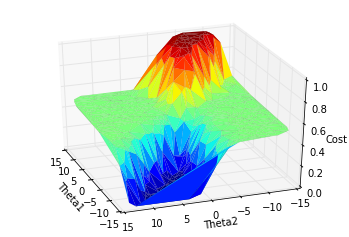

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#Our training data
X = np.matrix('0 1;1 1')
y = np.matrix('1;0')
#Let's randomly initialize weight to 5, just so we can see gradient descent at work
ep_init = 1.73
weights = np.matrix(np.random.normal(0,5, (2,1)))

#sigmoid function
def sigmoid(x):
	return np.matrix(1.0 / (1.0 + np.exp(-x)))

#run the neural net forward
def run(X, weights):
	return sigmoid(X * weights) #1x2 * 2x2 = 1x1 matrix

#Our cost function
def cost(X, y, weights):
	nn_output = run(X, weights)
	m = X.shape[0] #num training examples, 2
	return np.sum((1/m) * np.square(nn_output - y)) #MSE
#random pairs of theta1 and theta2 to feed into our cost function
theta1 = np.random.permutation(np.linspace(-15, 15, 500))
theta2 = np.random.permutation(np.linspace(-15, 15, 500))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
zs = [cost(X, y, np.matrix(theta).T) for theta in zip(theta1, theta2)]
ax.plot_trisurf(theta1, theta2, zs, linewidth=.02, cmap=cm.jet)
ax.azim = 160
ax.set_xlabel('Theta1')
ax.set_ylabel('Theta2')
ax.set_zlabel('Cost')
plt.show()

<p>Neat! A 3d surface of our cost function. Just in case it's not obvious, the more red parts of the surface are the highest (highest cost) and the darkest green/black is the lowest part of the plot (lowest cost). Notice how there's a big mountain peak and a deep valley, but then there are these very flat areas on each side. Those are basically local minima. If our weights initialize somewhere in there, it's not likely they'll escape down into the low cost valley because the gradients (slopes) in those parts are extremely small. Imagine we put a ball on top of the hill, that's our weight vector. Then we give it a little kick. There's a good chance it will roll down into the valley. But if we put the ball on the flat "grassy" area and give it a little kick, there's a good chance it'll stay in that flat area.</p>
<p>As it turns out, there's actually something we can do to make our situation better. We can simply define a different cost function. While the Mean Squared Error function is nice and simple and easy to comprehend, it clearly can lead to a lot of local minima. There's a much better cost function called a <b>cross-entropy</b> cost function, but unfortunately, it looks a lot uglier than the MSE. Here it is (I'm using $\theta$ to denote the weight vector):</p>
$$C(\theta) = \frac 1m * \sum_1^m [-y * log((h_{\theta}(x))) - (1 - y)(log(1 - (h_{\theta}(x)))]$$

Yikes, it must be horrible to figure out the derivative for that beast right? Actually it turns out to be okay. I'm not going to go through the steps of differantiating it, but if you really want to know please see reference #2.
$$ \frac{\partial C}{\partial W_j} = \frac 1m \sum_1^m x_m(h(x) - y) $$

Now this is just the partial derivative for the weights in the last layer, connecting to the output neurons. Things get more complicated when we add in hidden layers. That's why we need backpropagation. But first, let's see how our new cost function compares to the MSE. I'm literally copying and pasting the code from above, and only changing the return line in our cost function. Let's take a look.

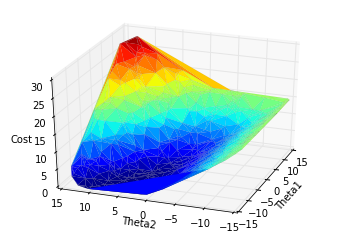

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#Our training data
X = np.matrix('0 1;1 1')
y = np.matrix('1;0')
#Let's randomly initialize weight to 5, just so we can see gradient descent at work
ep_init = 1.73
weights = np.matrix(np.random.normal(0,5, (2,1)))

#sigmoid function
def sigmoid(x):
	return np.matrix(1.0 / (1.0 + np.exp(-x)))

#run the neural net forward
def run(X, weights):
	return sigmoid(X * weights) #1x2 * 2x2 = 1x1 matrix

#Our cost function
def cost(X, y, weights):
	nn_output = run(X, weights)
	m = X.shape[0] #num training examples, 2
	return np.sum( -y.T*np.log(nn_output) - (1-y).T*np.log(1-nn_output)); #cross entropy cost function

theta1 = np.random.permutation(np.linspace(-15, 15, 500))
theta2 = np.random.permutation(np.linspace(-15, 15, 500))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
zs = [cost(X, y, np.matrix(theta).T) for theta in zip(theta1, theta2)]
ax.plot_trisurf(theta1, theta2, zs, linewidth=.02, cmap=cm.jet)
ax.azim = 200
ax.set_xlabel('Theta1')
ax.set_ylabel('Theta2')
ax.set_zlabel('Cost')
plt.show()

Again, more red = higher cost, more dark = lower cost. Hopefully you can appreciate that this cost function looks much smoother, with pretty much no major local minima. If you placed a ball anywhere on this surface and gave it a little kick, it would almost certainly roll to the low cost valley.

###Backpropagation

It's been a long time coming, but we're finally ready to delve into backpropagation. But if you've followed me so far, then backpropagation should make a lot more sense. As I've already mentioned before, backpropagation is simply the method or process we can use to compute $\frac{\partial C}{\partial W_j}$ for any weight in the network, including hidden weights. I'm not going to prove backpropagation to you here because I just don't have the mathematical skills to do so, but I will show you how to use it.

In order to demonstrate backpropagation, we're going to build a 3-layer neural network to solve the XOR problem. Below is the neural net architecture and the truth table for XOR.

<div style="display:inline-block;"><img src="images/XORNeuralNet.png" /></div>
<div style="display:inline-block; margin:0px 0px 100px 75px;">
<table>
<tr><td>$x_1$</td><td>$x_2$</td><td>$y$</td></tr>
<tr><td>$0$</td><td>$0$</td><td>$0$</td></tr>
<tr><td>$0$</td><td>$1$</td><td>$1$</td></tr>
<tr><td>$1$</td><td>$0$</td><td>$1$</td></tr>
<tr><td>$1$</td><td>$1$</td><td>$0$</td></tr>
</table></div>

<p>As you can see, our 3-layer network has 2 inputs, 3 hidden neurons, and 1 output (ignoring the bias nodes). There are two theta matrices between each layer, $\theta_1 = 3x3$ and $\theta_2 = 4x1$ (referring to matrix dimensions). Great, now how do we calculate those partial derivatives so we can do gradient descent? Here are the steps.</p>
<p>
1. Starting at the output neurons, we calculate their node delta, $\delta$. In our case, we only have one output neuron, and therefore a $\delta_1$. Delta's represent the error for each node in the network. It's easy to calculate the output node's delta, it's simply $\delta_1 = (h(x) - y)$ which is what the output neuron output minus $y$, the expected value. Note, even if we had more than one output neuron, we could calculate all their deltas, $\delta_1 ... \delta_j$, in the same way, $\delta_j = (h(x) - y)$ and at the same time if $h(x)$ and $y$ are vectors.
</p><p>
2. Here's where we start the backpropagation. To calculate the previous layer's (in our case, the hidden layer) deltas, we backpropagate the output errors/deltas using this formula:
$$\delta_j^{l-1} = (\theta_2 * \delta_j^l) \odot (a^{l-1} \odot (1 - a^{l-1}))$$
Where $*$ indicates the dot product, $\odot$ indicates element-wise multiplication (hamdard product), and $l$ = the number of layers. So $\delta_j^l$ refers to the output layer deltas, whereas $\delta_j^{l-1}$ refers to the previous, hidden layer deltas, and $\delta_j^{l-2}$ would be 2 layers before the output layer and so on. $a^{l-1}$ refers to the activations/outputs of the hidden layer (or layer before $l$). Note: <b>We only calculate delta's up to the last hidden layer, we don't calculate deltas for the input layer.</b></p><p>


3. Calculate the gradients using this formula: $$\frac{\partial C}{\partial \theta_j} = \delta^{1-1} * a^l$$

4. Use the gradients to perform gradient descent like normal.
</p>

Below I've implemented the XOR neural net we've described using backpropagation and gradient descent. If you have familiarity with forward propagation in simple neural nets, then most of it should be straightforward. Hopefully the backpropagation portion is starting to make sense now too.

In [36]:
import numpy as np
X = np.matrix([ [0,0],[0,1],[1,0],[1,1]]) #4x2 (4=num training examples)
y = np.matrix([[0,1,1,0]]).T #4x1
numIn, numHid, numOut = 2, 3, 1; #setup layers
#initialize weights
theta1 = ( 0.5 * np.sqrt ( 6 / ( numIn + numHid) ) * np.random.randn( numIn + 1, numHid ) )
theta2 = ( 0.5 * np.sqrt ( 6 / ( numHid + numOut ) ) * np.random.randn( numHid + 1, numOut ) )
#initialize weight gradient matrices
theta1_grad = np.matrix(np.zeros((numIn+1, numHid))) #3x2
theta2_grad = np.matrix(np.zeros((numHid + 1, numOut)))#3x1
alpha = 0.1 #learning rate
epochs = 10000 #num iterations
m = X.shape[0]; #num training examples

def sigmoid(x):
	return np.matrix(1.0 / (1.0 + np.exp(-x)))

In [38]:
#backpropagation/gradient descent
for j in range(epochs):
	for x in range(m): #for each training example
		#forward propagation
		a1 = np.matrix(np.concatenate((X[x,:], np.ones((1,1))), axis=1))
		z2 = np.matrix(a1.dot(theta1)) #1x3 * 3x3 = 1x3
		a2 = np.matrix(np.concatenate((sigmoid(z2), np.ones((1,1))), axis=1))
		z3 = np.matrix(a2.dot(theta2))
		a3 = np.matrix(sigmoid(z3)) #final output
		#backpropagation
		delta3 = np.matrix(a3 - y[x]) #1x1
		delta2 = np.matrix(np.multiply(theta2.dot(delta3), np.multiply(a2,(1-a2)).T)) #1x4
        #Calculate the gradients for each training example and sum them together, getting an average
        #gradient over all the training pairs. Then at the end, we modify our weights.
		theta1_grad += np.matrix((delta2[0:numHid, :].dot(a1))).T
		theta2_grad += np.matrix((delta3.dot(a2))).T #1x1 * 1x4 = 1x4
    #update the weights after going through all training examples
	theta1 += -1 * (1/m)*np.multiply(alpha, theta1_grad)
	theta2 += -1 * (1/m)*np.multiply(alpha, theta2_grad)
	#reset gradients
	theta1_grad = np.matrix(np.zeros((numIn+1, numHid)))
	theta2_grad = np.matrix(np.zeros((numHid + 1, numOut)))

In [39]:
print("Results:\n")#run forward after training to see if it worked
a1 = np.matrix(np.concatenate((X, np.ones((4,1))), axis=1))
z2 = np.matrix(a1.dot(theta1))
a2 = np.matrix(np.concatenate((sigmoid(z2), np.ones((4,1))), axis=1))
z3 = np.matrix(a2.dot(theta2))
a3 = np.matrix(sigmoid(z3))
print(a3)

Results:

[[ 0.01205117]
 [ 0.9825991 ]
 [ 0.98941642]
 [ 0.02203315]]


<p>Awesome, it worked! We expected [0 1 1 0] and we got results pretty darn close. Notice that the epochs is <b>10,000</b>! While gradient descent is way better than random searches or genetic algorithms, it still can take many, many iterations to successfully train on even a simple XOR problem like we've implemented. Also note that I chose $\alpha = 0.1$ after experimenting with it to see which value gave me the best result. I generally change it by a factor of ten in both directions to check.</p>
<p>Closing words...<br />
I really struggled understanding how backpropagation worked and some of the other details of training a neural network so this is my attempt to help others who were in my position get a better handle on these concepts. Despite the increasing popularity of machine learning, there still is a lack of good tutorials at a true beginner level, especially for those of us without strong math backgrounds. This was a long article, so please email me if you spot inevitable errors or have comments or questions.
</p>

###References:

1. https://en.wikipedia.org/wiki/Gradient_descent#Examples
2. http://neuralnetworksanddeeplearning.com/chap3.html (*Highly recommend)
3. Machine Learning by Andrew Ng, Coursera
4. http://www.wolframalpha.com/